# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv('FinTech_API_Keys.env')

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
btc_response = requests.get(btc_url).json()
btc_response

{'data': {'1': {'id': 1,
   'name': 'Bitcoin',
   'symbol': 'BTC',
   'website_slug': 'bitcoin',
   'rank': 1,
   'circulating_supply': 19352800,
   'total_supply': 19352800,
   'max_supply': 21000000,
   'quotes': {'USD': {'price': 27343.0,
     'volume_24h': 20382255778,
     'market_cap': 529311978281,
     'percentage_change_1h': 0.383763896321154,
     'percentage_change_24h': -3.10201430555219,
     'percentage_change_7d': -10.0712174127067,
     'percent_change_1h': 0.383763896321154,
     'percent_change_24h': -3.10201430555219,
     'percent_change_7d': -10.0712174127067},
    'CAD': {'price': 37145.4655,
     'volume_24h': 27689294474.413,
     'market_cap': 719070322494.739,
     'percent_change_1h': 0.383763896321154,
     'percent_change_24h': -3.10201430555219,
     'percent_change_7d': -10.0712174127067}},
   'last_updated': 1682120383}},
 'metadata': {'timestamp': 1682120383,
  'num_cryptocurrencies': 3119,
  'error': None}}

In [6]:
# Store BTC price
btc_price = btc_response['data']['1']['quotes']['USD']['price']
btc_price

27343.0

In [7]:
# Fetch current ETH price
eth_response = requests.get(eth_url).json()
eth_response

{'data': {'1027': {'id': 1027,
   'name': 'Ethereum',
   'symbol': 'ETH',
   'website_slug': 'ethereum',
   'rank': 2,
   'circulating_supply': 120416480,
   'total_supply': 120416480,
   'max_supply': 120416480,
   'quotes': {'USD': {'price': 1852.89,
     'volume_24h': 13391692878,
     'market_cap': 223087597609,
     'percentage_change_1h': 0.654399514304063,
     'percentage_change_24h': -4.55522865594098,
     'percentage_change_7d': -7.94384351294443,
     'percent_change_1h': 0.654399514304063,
     'percent_change_24h': -4.55522865594098,
     'percent_change_7d': -7.94384351294443},
    'CAD': {'price': 2517.151065,
     'volume_24h': 18192614774.763,
     'market_cap': 303064501351.827,
     'percent_change_1h': 0.654399514304063,
     'percent_change_24h': -4.55522865594098,
     'percent_change_7d': -7.94384351294443}},
   'last_updated': 1682120385}},
 'metadata': {'timestamp': 1682120385,
  'num_cryptocurrencies': 3119,
  'error': None}}

In [8]:
# Store BTC price
eth_price = eth_response['data']['1027']['quotes']['USD']['price']
eth_price

1852.89

In [9]:
# Compute current value of my crpto
my_btc_value = btc_price * my_btc
my_eth_value = eth_price * my_eth

# Print current crypto wallet balance and use comma as a thousands seperator
print(f"The current value of your {my_btc} BTC is ${my_btc_value:,.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:,.2f}")

The current value of your 1.2 BTC is $32,811.60
The current value of your 5.3 ETH is $9,820.32


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [10]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [11]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv('ALPACA_API_KEY')
alpaca_api_secret_key = os.getenv('ALPACA_SECRET_KEY')

# Create the Alpaca API object
alpaca_API_obj = tradeapi.REST(
    alpaca_api_key,
    alpaca_api_secret_key,
    api_version = 'v2'
)

In [12]:
# Format current date as ISO format
today = pd.Timestamp('2023-04-11', tz = 'America/New_York').isoformat()

# Set the tickers
tickers = ['AGG', 'SPY']

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca_API_obj.get_bars(
    tickers,
    timeframe,
    start = today ,
    end = today
).df
df_portfolio

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2023-04-11 04:00:00+00:00,99.81,99.88,99.59,99.81,4543803,19479,99.740336,AGG
2023-04-11 04:00:00+00:00,410.26,411.18,408.92,409.72,59316777,403316,410.018650,SPY


In [13]:
# Reorganize the DataFrame
# Separate ticker data
AGG = df_portfolio[df_portfolio['symbol'] == 'AGG'].drop('symbol', axis = 1)
SPY = df_portfolio[df_portfolio['symbol'] == 'SPY'].drop('symbol', axis = 1)


# Concatenate the ticker DataFrames
df_portfolio_reorg = pd.concat(
    [AGG,SPY],
    keys = ['AGG','SPY'], 
    axis = 1
)
df_portfolio_reorg

AGG                                            \
                            open   high    low  close   volume trade_count   
timestamp                                                                    
2023-04-11 04:00:00+00:00  99.81  99.88  99.59  99.81  4543803       19479   

                                         SPY                          \
                                vwap    open    high     low   close   
timestamp                                                              
2023-04-11 04:00:00+00:00  99.740336  410.26  411.18  408.92  409.72   

                                                            
                             volume trade_count       vwap  
timestamp                                                   
2023-04-11 04:00:00+00:00  59316777      403316  410.01865

In [14]:
# Pick AGG and SPY close prices
agg_close_price = df_portfolio_reorg['AGG']['close'][0]
spy_close_price = df_portfolio_reorg['SPY']['close'][0]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $99.81
Current SPY closing price: $409.72


In [15]:
# Compute the current value of shares
my_agg_value = agg_close_price * my_agg
my_spy_value =  spy_close_price * my_spy

# Print current value of shares to two decimal places and seperated by commas
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:,.2f}")
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:,.2f}")

The current value of your 200 AGG shares is $19,962.00
The current value of your 50 SPY shares is $20,486.00


### Savings Health Analysis

In [16]:
# Set monthly household income
monthly_income = 12000


# Consolidate financial assets data
crypto = my_btc_value + my_eth_value
shares = my_agg_value + my_spy_value

# Create savings DataFrame
df_savings = pd.DataFrame([crypto, shares], index=['crypto', 'shares'], columns=['amount'])

# Display savings DataFrame
display(df_savings)

,amount
crypto,42631.917
shares,40448.000


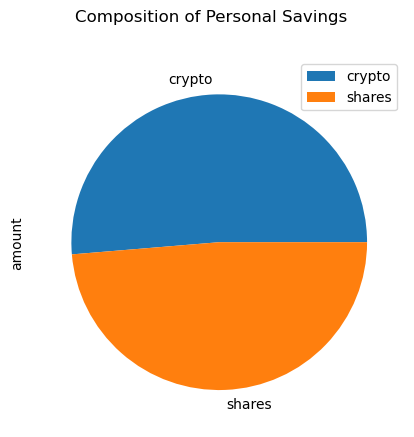

In [17]:
# Plot savings pie chart
df_savings.plot.pie(title="Composition of Personal Savings", subplots = True);

In [18]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = crypto + shares



# Validate saving health
if total_savings > emergency_fund:
    print('Congratulations! You have enough money in your emergency fund')
elif total_savings == emergency_fund:
    print('Congratulations! You have reached your savings goal')
else:
    print(f'You have enough money in your emergency fund, you reqquire an additional ${(emergency_fund-total_savings):,.2f} to reach your goal')

Congratulations! You have enough money in your emergency fund


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [19]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [22]:
# Get 5 years' worth of historical data for SPY and AGG
df_retirement_portfolio = alpaca_API_obj.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df
df_retirement_portfolio.head()

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2016-05-02 04:00:00+00:00,110.74,110.7400,110.5200,110.605,3553939,15119,110.627199,AGG
2016-05-03 04:00:00+00:00,110.89,110.9450,110.7500,110.810,3044940,15662,110.865995,AGG
2016-05-04 04:00:00+00:00,110.91,110.9315,110.7595,110.860,2920608,13982,110.879063,AGG
2016-05-05 04:00:00+00:00,110.92,111.1600,110.8010,111.140,3008142,15707,111.028363,AGG
2016-05-06 04:00:00+00:00,111.12,111.1200,110.9700,110.970,2718710,12697,111.031967,AGG


In [26]:
# Reorganize the DataFrame
# Separate ticker data
AGG_ret = df_retirement_portfolio[df_retirement_portfolio['symbol'] == 'AGG'].drop('symbol', axis = 1)
SPY_ret = df_retirement_portfolio[df_retirement_portfolio['symbol'] == 'SPY'].drop('symbol', axis = 1)




# Concatenate the ticker DataFrames
df_retirement_portfolio_reorg = pd.concat(
    [AGG_ret,SPY_ret],
    keys = ['AGG','SPY'], 
    axis = 1
)
df_retirement_portfolio_reorg

# Display sample data
df_retirement_portfolio_reorg.head()

AGG                                        \
                             open      high       low    close   volume   
timestamp                                                                 
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.605  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.810  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.860  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.140  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.970  2718710   

                                                      SPY                  \
                          trade_count        vwap    open    high     low   
timestamp                                                                   
2016-05-02 04:00:00+00:00       15119  110.627199  206.92  208.18  206.41   
2016-05-03 04:00:00+00:00       15662  110.865995  206.52  206.80  205.28   
2016-05-04 04:00:00+00:00       13982  110.879063  204.99  205.85  204.42   
2016-05-05 04:00:00+00:00       15707  111.028363  205.56  205.98  204.47   
2016-05-06 04:00:00+00:00       12697  111.031967  204.08  205.77  203.88   

                                                                        
                              close     volume trade_count        vwap  
timestamp                                                               
2016-05-02 04:00:00+00:00  207.9700   61908515      263580  207.294812  
2016-05-03 04:00:00+00:00  206.1592  106422142      377518  206.312060  
2016-05-04 04:00:00+00:00  205.0100   92199810      345261  205.090172  
2016-05-05 04:00:00+00:00  204.9700   67597222      280622  205.141555  
2016-05-06 04:00:00+00:00  205.7200   89131004      340335  204.937074

In [37]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30year = MCSimulation(
    portfolio_data = df_retirement_portfolio_reorg,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [38]:
# Printing the simulation input data
MC_30year.portfolio_data.head()

AGG                                        \
                             open      high       low    close   volume   
timestamp                                                                 
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.605  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.810  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.860  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.140  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.970  2718710   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2016-05-02 04:00:00+00:00       15119  110.627199          NaN  206.92   
2016-05-03 04:00:00+00:00       15662  110.865995     0.001853  206.52   
2016-05-04 04:00:00+00:00       13982  110.879063     0.000451  204.99   
2016-05-05 04:00:00+00:00       15707  111.028363     0.002526  205.56   
2016-05-06 04:00:00+00:00       12697  111.031967    -0.001530  204.08   

                                                                            \
                             high     low     close     volume trade_count   
timestamp                                                                    
2016-05-02 04:00:00+00:00  208.18  206.41  207.9700   61908515      263580   
2016-05-03 04:00:00+00:00  206.80  205.28  206.1592  106422142      377518   
2016-05-04 04:00:00+00:00  205.85  204.42  205.0100   92199810      345261   
2016-05-05 04:00:00+00:00  205.98  204.47  204.9700   67597222      280622   
2016-05-06 04:00:00+00:00  205.77  203.88  205.7200   89131004      340335   

                                                    
                                 vwap daily_return  
timestamp                                           
2016-05-02 04:00:00+00:00  207.294812          NaN  
2016-05-03 04:00:00+00:00  206.312060    -0.008707  
2016-05-04 04:00:00+00:00  205.090172    -0.005574  
2016-05-05 04:00:00+00:00  205.141555    -0.000195  
2016-05-06 04:00:00+00:00  204.937074     0.003659

In [39]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/shayan/Desktop/USYD_FinTech_Bootcamp_2023_Material/05-APIs/Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001277,0.995201,0.996765,0.998515,0.995868,1.004694,1.007494,0.995931,1.004512,0.996528,...,0.996347,0.999051,1.000554,0.998417,0.989147,1.001168,0.994840,1.000673,0.996751,1.006067
2,1.005535,0.983607,0.984513,1.004379,0.994214,1.005285,1.014146,0.993814,1.005463,1.001886,...,1.005111,0.994608,1.005635,1.006725,0.996349,0.999205,0.983466,1.004475,0.998129,0.996557
3,0.998331,0.977698,0.989701,0.998484,0.986814,1.020939,1.018963,0.997684,1.004181,1.007791,...,0.997450,0.994827,0.998641,1.012575,0.998638,1.016037,0.978280,1.003848,1.001976,0.984436
4,0.989848,0.972931,0.986356,0.999639,0.986138,1.024188,1.022134,1.013295,1.002232,1.002606,...,1.004504,0.990897,1.001988,1.002244,0.999218,1.012058,0.972481,0.994248,1.000828,0.976555
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,12.157558,33.891076,52.450161,14.049599,6.238035,7.009301,27.078065,3.735171,20.192859,5.343299,...,5.313683,15.145660,9.317496,9.418516,11.308529,12.386990,23.149208,16.957393,19.184398,34.526707
7557,12.078696,33.964054,52.708797,14.095017,6.177045,7.047690,26.964892,3.685427,20.220679,5.292125,...,5.295155,15.163647,9.343114,9.437777,11.283931,12.414729,23.043931,17.078715,19.343898,34.465927
7558,12.038024,33.847053,53.404862,14.109111,6.180696,7.019820,26.708498,3.660069,20.322088,5.283070,...,5.286093,15.358722,9.389308,9.524113,11.195094,12.490163,23.179610,17.068686,19.284501,34.431945
7559,12.067070,33.635976,53.795304,13.931817,6.221757,6.994250,26.481878,3.691834,20.500355,5.266607,...,5.277675,15.509791,9.427766,9.596887,11.253481,12.377417,23.154909,17.113587,19.449866,34.373943


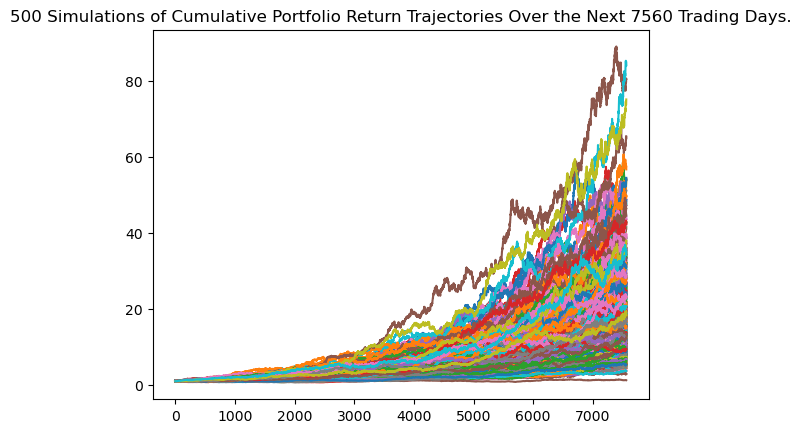

In [40]:
# Plot simulation outcomes
line_plot = MC_30year.plot_simulation()

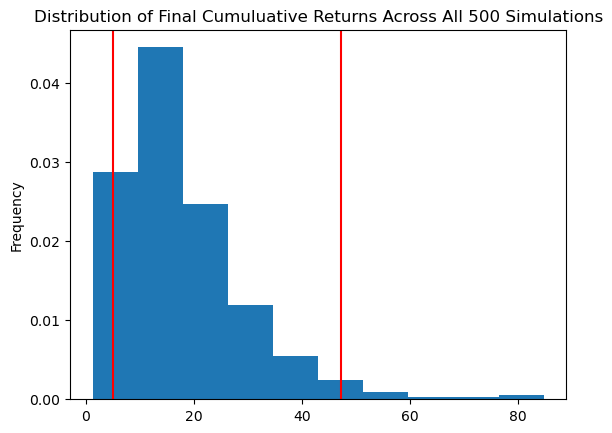

In [41]:
# Plot probability distribution and confidence intervals
dist_plot = MC_30year.plot_distribution()

### Retirement Analysis

In [42]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl = MC_30year.summarize_cumulative_return()

# Print summary statistics
print(even_tbl)

count           500.000000
mean             17.864259
std              11.580396
min               1.262457
25%               9.794247
50%              14.335680
75%              22.633996
max              84.831089
95% CI Lower      4.980013
95% CI Upper     47.287914
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [43]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(even_tbl[8]*initial_investment,2)
ci_upper = round(even_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $99600.27 and $945758.29


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [44]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(even_tbl[8]*initial_investment,2)
ci_upper = round(even_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $149400.4 and $1418637.43


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [46]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5year = MCSimulation(
    portfolio_data = df_retirement_portfolio_reorg,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [47]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/shayan/Desktop/USYD_FinTech_Bootcamp_2023_Material/05-APIs/Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.005654,0.996474,1.010723,1.005789,0.991413,0.999822,0.997545,1.004013,0.995003,0.996432,...,1.009391,1.004843,1.006523,0.995838,0.977158,0.996408,1.002742,1.007538,1.006702,1.003983
2,1.007348,0.998076,1.010542,0.995238,0.980631,1.004487,0.997853,1.010372,0.991926,0.995209,...,1.006395,1.003398,1.019760,0.990696,0.979862,0.997435,0.993083,1.014958,1.009095,1.007815
3,1.009150,0.992499,1.019750,0.992697,0.976320,0.998351,0.996849,1.024553,0.989876,0.996209,...,1.020536,1.012734,1.029502,0.987264,0.972719,0.993331,0.987202,1.025567,1.008274,1.010353
4,1.008432,0.983994,1.010551,0.995029,0.971505,0.999621,0.998986,1.024684,0.991994,1.011983,...,1.025250,1.010591,1.040582,0.992164,0.977502,0.980189,0.985669,1.034224,1.012373,1.006082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,25.274100,8.833935,12.082641,12.231690,11.547273,16.485874,27.263410,10.079508,16.000851,4.760530,...,12.535977,13.375761,11.869083,20.355343,15.010861,16.979463,18.503617,6.248088,9.601592,14.404656
7557,25.467934,8.873037,11.978607,12.193210,11.645814,16.554791,27.295080,10.024086,15.725256,4.770585,...,12.552003,13.429429,11.938404,20.259260,15.173911,17.121602,18.308616,6.171921,9.617372,14.395912
7558,25.385604,8.910986,12.048323,12.152500,11.571469,16.476645,27.619065,10.005815,15.754442,4.769008,...,12.510103,13.476563,11.947996,20.346961,15.068721,17.244987,18.182169,6.167210,9.628293,14.563921
7559,25.327744,8.837374,12.102935,12.097816,11.757090,16.469635,27.631488,9.933857,15.752152,4.769607,...,12.513470,13.350360,12.018574,20.279854,15.272674,17.347872,18.161194,6.186837,9.687900,14.409139


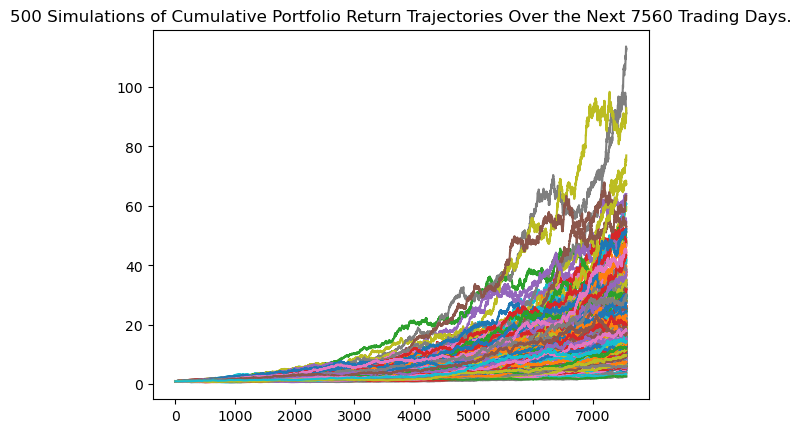

In [48]:
# Plot simulation outcomes
line_plot_5year = MC_5year.plot_simulation()

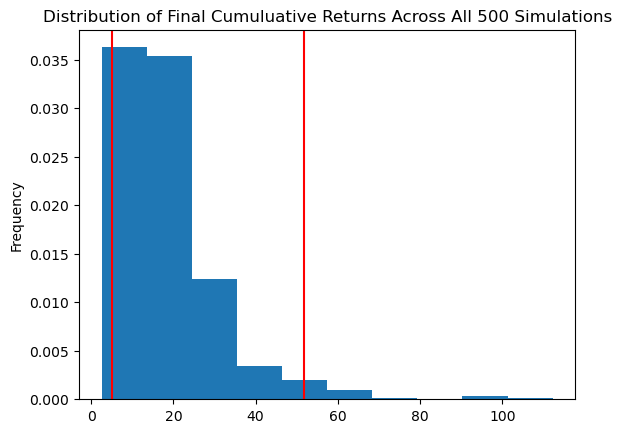

In [49]:
# Plot probability distribution and confidence intervals
dist_plot_5year = MC_5year.plot_distribution()

In [50]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl_5year = MC_5year.summarize_cumulative_return()

# Print summary statistics
print(even_tbl_5year)

count           500.000000
mean             18.586201
std              12.787774
min               2.549192
25%              10.930145
50%              15.160504
75%              22.372067
max             112.245499
95% CI Lower      5.114083
95% CI Upper     51.782002
Name: 7560, dtype: float64


In [51]:
# Set initial investment - higher at $100,000
initial_investment_5year = 100000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_5year = round(even_tbl_5year[8]*initial_investment_5year,2)
ci_upper_5year = round(even_tbl_5year[9]*initial_investment_5year,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_5year} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_5year} and ${ci_upper_5year}")

There is a 95% chance that an initial investment of $100000 in the portfolio over the next 5 years will end within in the range of $511408.31 and $5178200.19


### Ten Years Retirement Option

In [53]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# Different proportion of bonds and shares at 20% AGG and 80% SPY
MC_10year = MCSimulation(
    portfolio_data = df_retirement_portfolio_reorg,
    weights = [.20,.80],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [54]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/shayan/Desktop/USYD_FinTech_Bootcamp_2023_Material/05-APIs/Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001855,1.003855,0.994646,0.989644,1.002116,1.007598,1.002232,0.992648,1.004526,0.993504,...,0.992481,0.999903,1.004306,1.001520,0.984523,1.023374,1.013839,1.000564,0.991379,0.989250
2,0.994608,1.002435,0.976472,1.000345,1.008796,0.990994,0.997900,0.990448,0.997867,0.982945,...,0.992013,0.992715,1.006641,1.011139,1.004195,1.024528,1.017902,1.015513,1.020507,0.991893
3,0.999822,0.987054,0.992356,0.986452,1.006424,0.987837,1.001565,0.998527,0.990398,0.983917,...,0.990518,0.997899,1.017850,1.005205,1.011185,1.032593,1.021384,0.992243,1.026997,0.993851
4,1.007904,0.974719,0.982625,0.983597,1.010778,1.001437,1.005968,0.991846,1.004848,0.986385,...,0.996953,0.996925,1.010745,0.991828,0.998616,1.019167,1.028959,0.986221,1.018744,0.996766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,58.937830,74.568693,19.969827,77.320311,84.365529,14.165667,10.713514,33.109698,34.155319,46.163517,...,21.860352,10.319207,111.292650,65.913475,13.498362,30.397544,143.158977,36.296945,40.885632,62.680753
7557,59.228305,74.981498,19.965510,76.571826,81.935103,14.328578,10.784166,33.543137,34.343225,46.015870,...,22.051989,10.436789,111.920328,65.577161,13.435616,30.610554,142.334861,36.702709,40.866836,62.440744
7558,58.805840,75.904440,19.855070,76.862174,83.091669,14.543427,10.832224,33.497669,34.526310,45.978682,...,22.289927,10.715545,112.443594,65.222797,13.381272,31.128251,142.205126,36.845481,40.765332,62.580750
7559,58.604212,75.081112,19.825154,76.834863,83.571184,14.452425,10.812342,33.451417,34.790479,45.879840,...,22.454111,10.744942,110.717723,65.926591,13.270310,31.066864,142.806841,37.096658,40.745878,62.873941


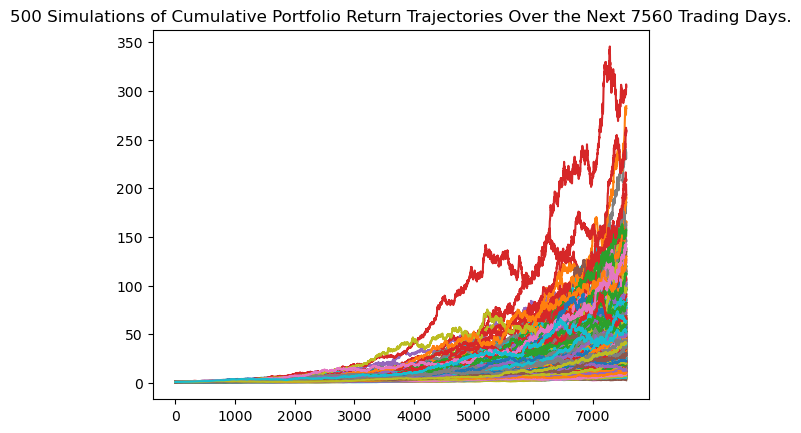

In [55]:
# Plot simulation outcomes
line_plot_10year = MC_10year.plot_simulation()

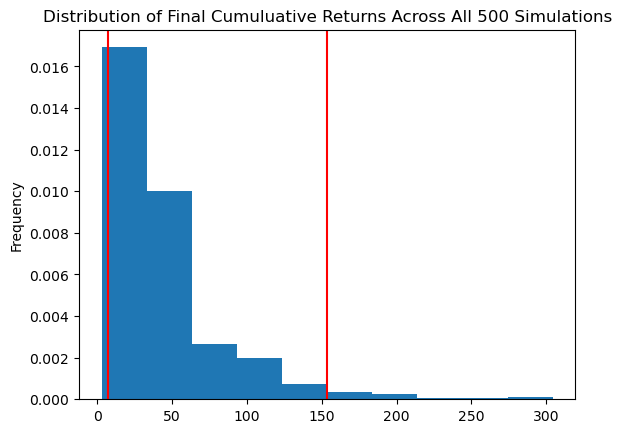

In [56]:
# Plot probability distribution and confidence intervals
dist_plot_10year = MC_10year.plot_distribution()

In [57]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl_10year = MC_10year.summarize_cumulative_return()

# Print summary statistics
print(even_tbl_10year)

count           500.000000
mean             44.385720
std              39.831740
min               2.834315
25%              19.555490
50%              32.232035
75%              55.292604
max             304.241670
95% CI Lower      6.721131
95% CI Upper    153.393374
Name: 7560, dtype: float64


In [58]:
# Set initial investment
initial_investment_ten = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(even_tbl_10year[8]*initial_investment_ten,2)
ci_upper_ten = round(even_tbl_10year[9]*initial_investment_ten,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_ten} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 10 years will end within in the range of $134422.63 and $3067867.47
